In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'BOAT', 'AMZN', 'TSLA', 'MS', 'NVDA', 'NFLX', 'INTC', 'AMD']  # Replace 'MSFT' with 'BOAT'

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data for each company in the tech_list
company_list = []

for stock in tech_list:
    data = yf.download(stock, start, end)
    data["Company"] = stock
    company_list.append(data)

# Concatenate data for all companies into a single DataFrame
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the combined DataFrame
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-04-08,168.199997,171.660004,166.820007,169.899994,169.899994,43997500,AMD
2024-04-09,170.210007,171.600006,167.289993,170.779999,170.779999,42928000,AMD
2024-04-10,166.710007,169.779999,164.000000,167.139999,167.139999,59600000,AMD
2024-04-11,167.550003,170.949997,166.550003,170.500000,170.500000,48994500,AMD
2024-04-12,164.529999,165.699997,161.820007,163.279999,163.279999,63334200,AMD
2024-04-15,164.429993,164.440002,158.759995,160.320007,160.320007,61461200,AMD
2024-04-16,162.279999,164.880005,161.669998,163.460007,163.460007,55302100,AMD
2024-04-17,163.970001,164.449997,153.880005,154.020004,154.020004,75909000,AMD
2024-04-18,155.509995,156.960007,152.320007,155.080002,155.080002,52669800,AMD


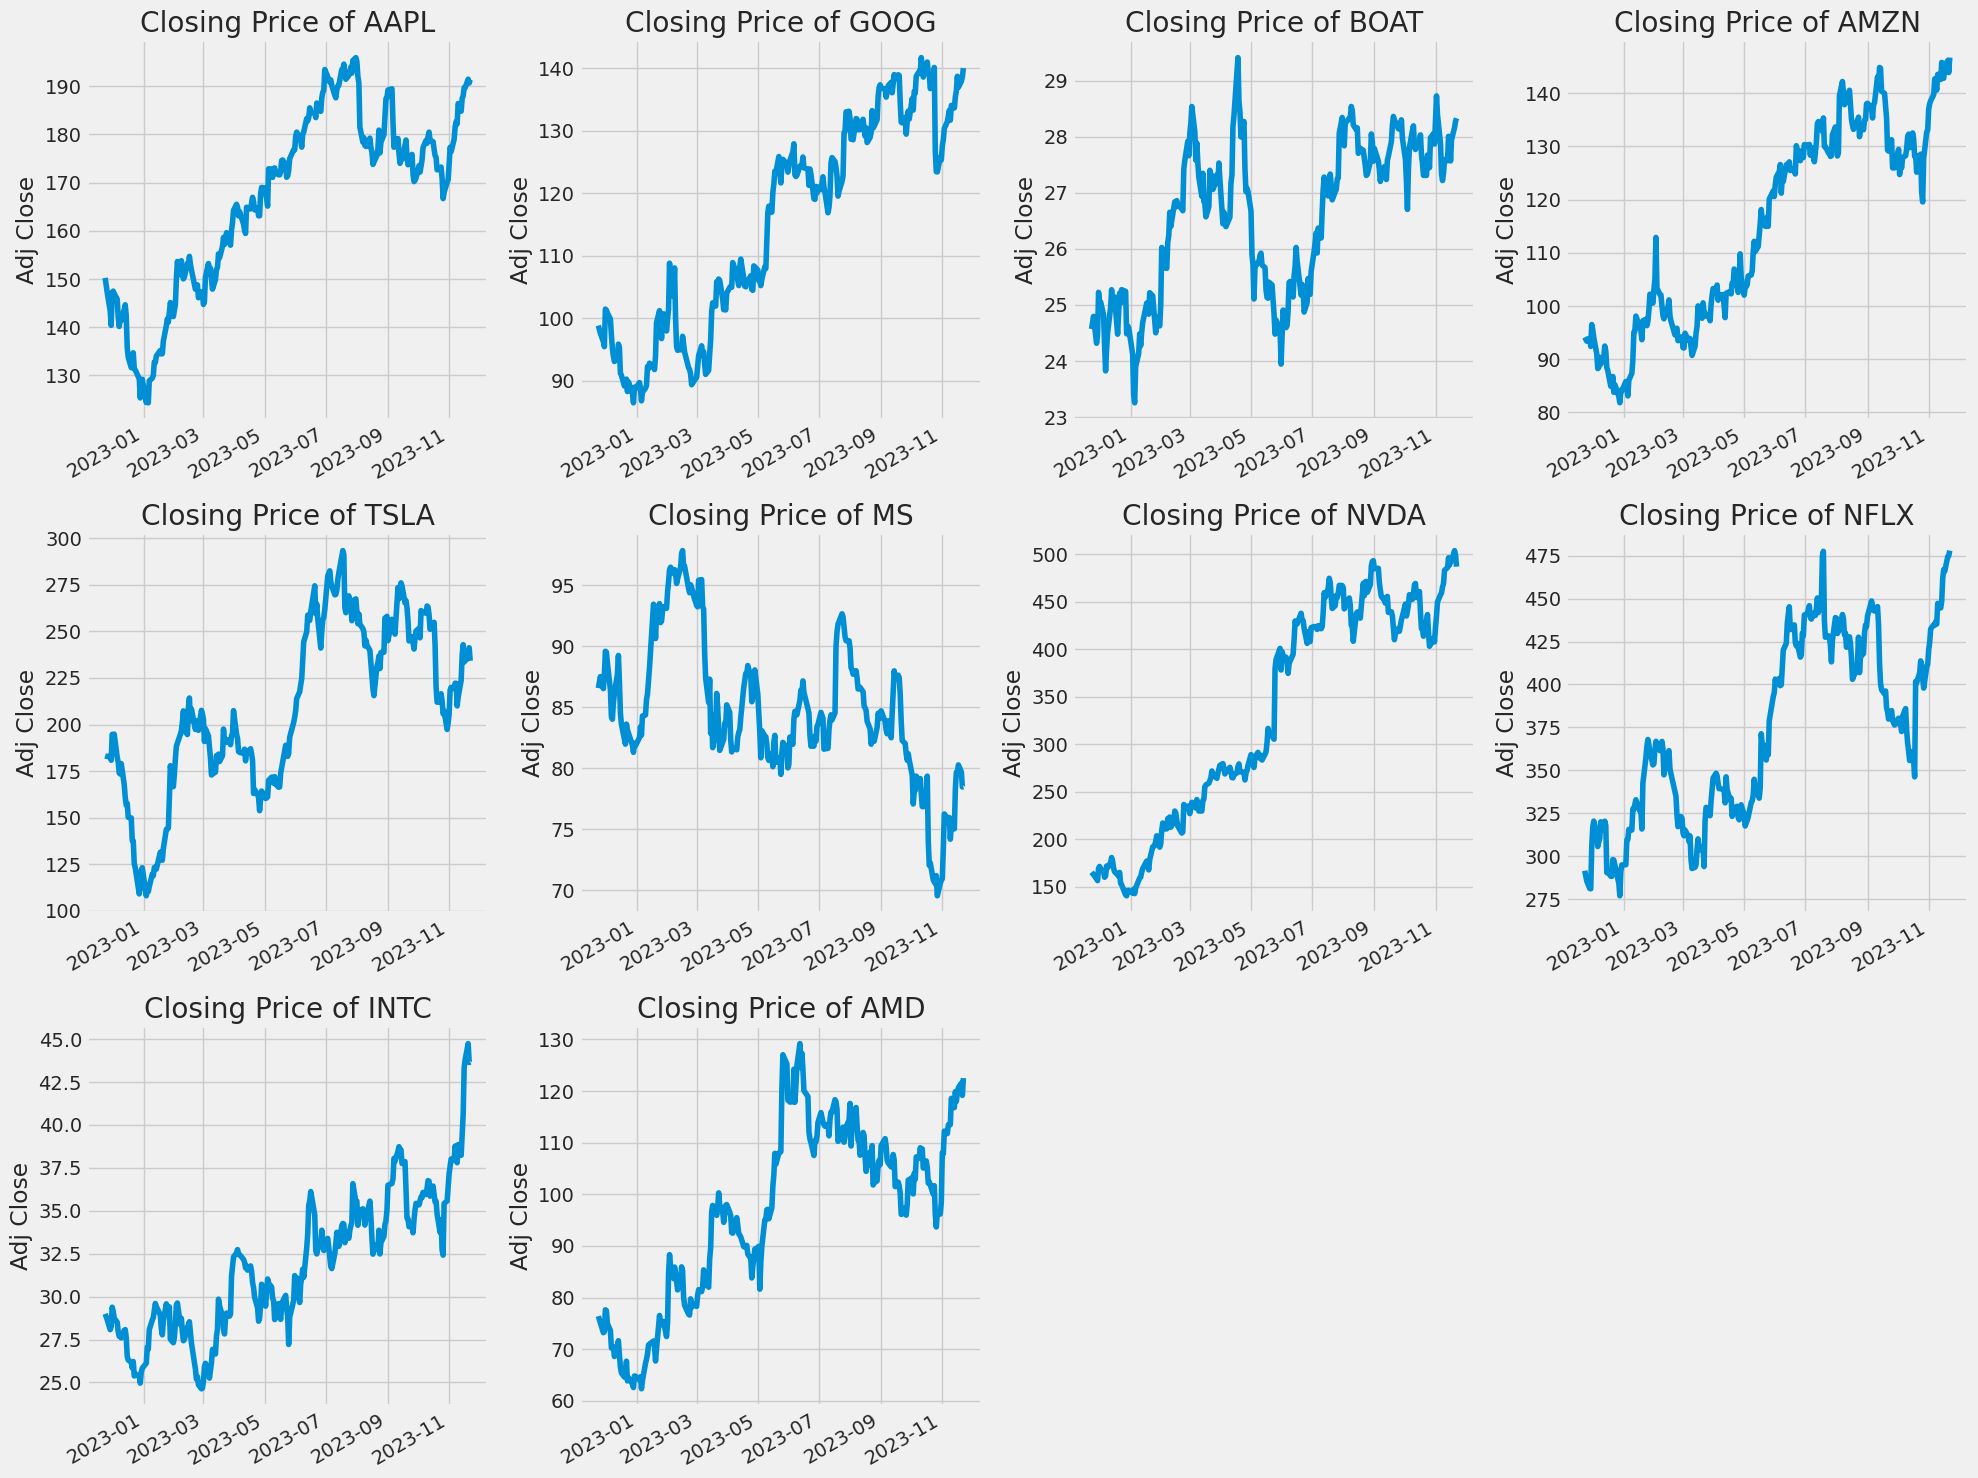

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 4

for i, (company, stock) in enumerate(zip(company_list, tech_list), 1):
    plt.subplot(num_rows, num_cols, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock}")

plt.tight_layout()
plt.show()


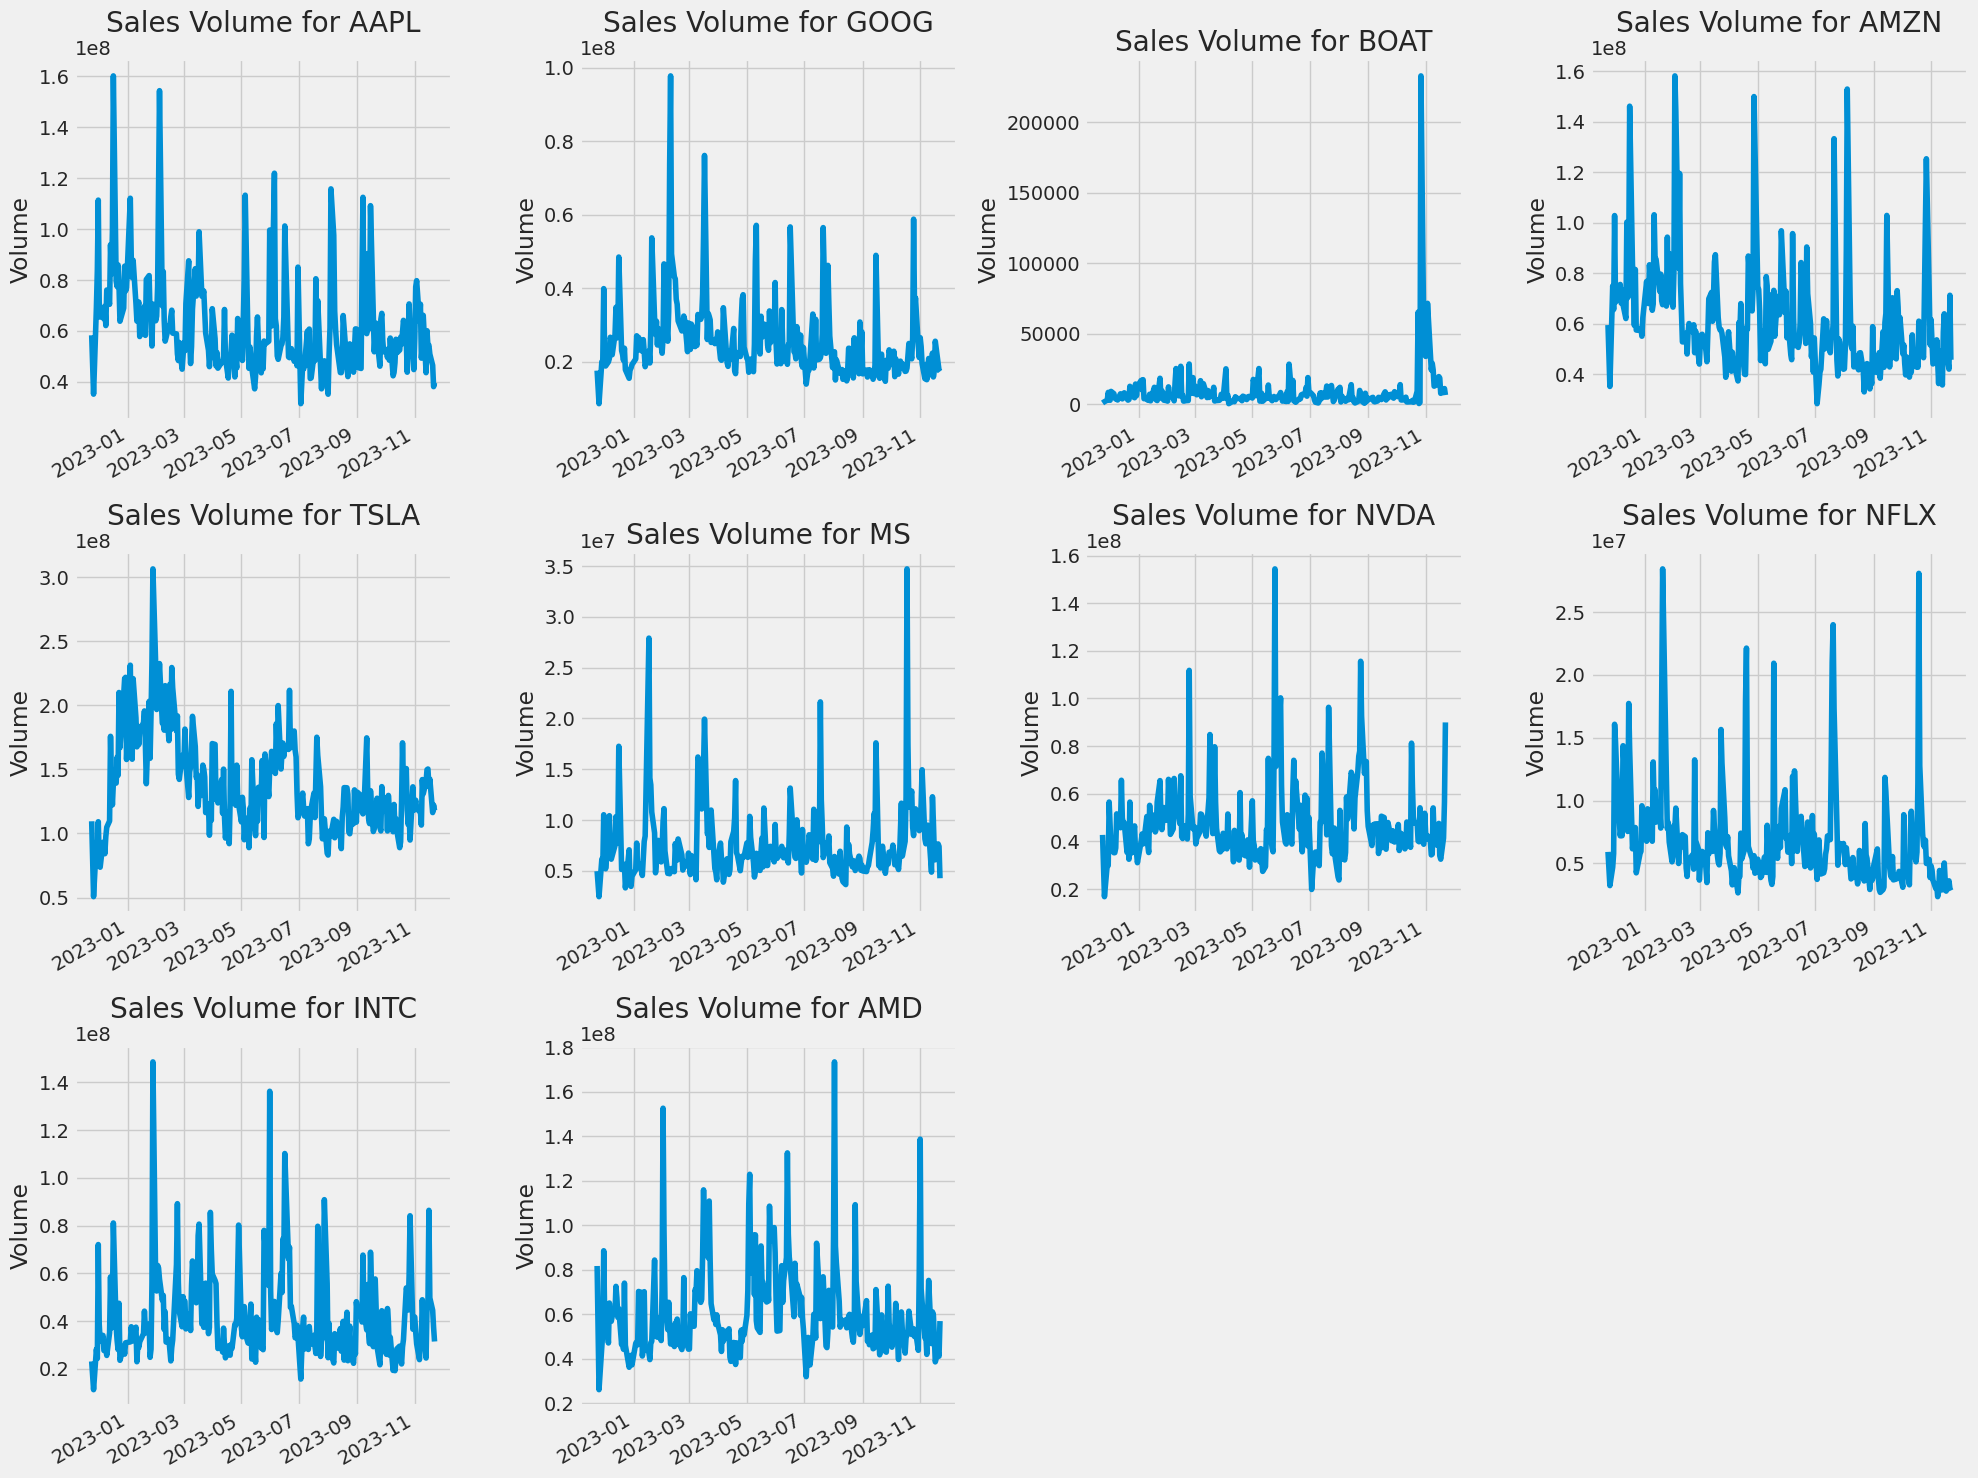

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 4

for i, (company, stock) in enumerate(zip(company_list, tech_list), 1):
    plt.subplot(num_rows, num_cols, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock}")

plt.tight_layout()
plt.show()


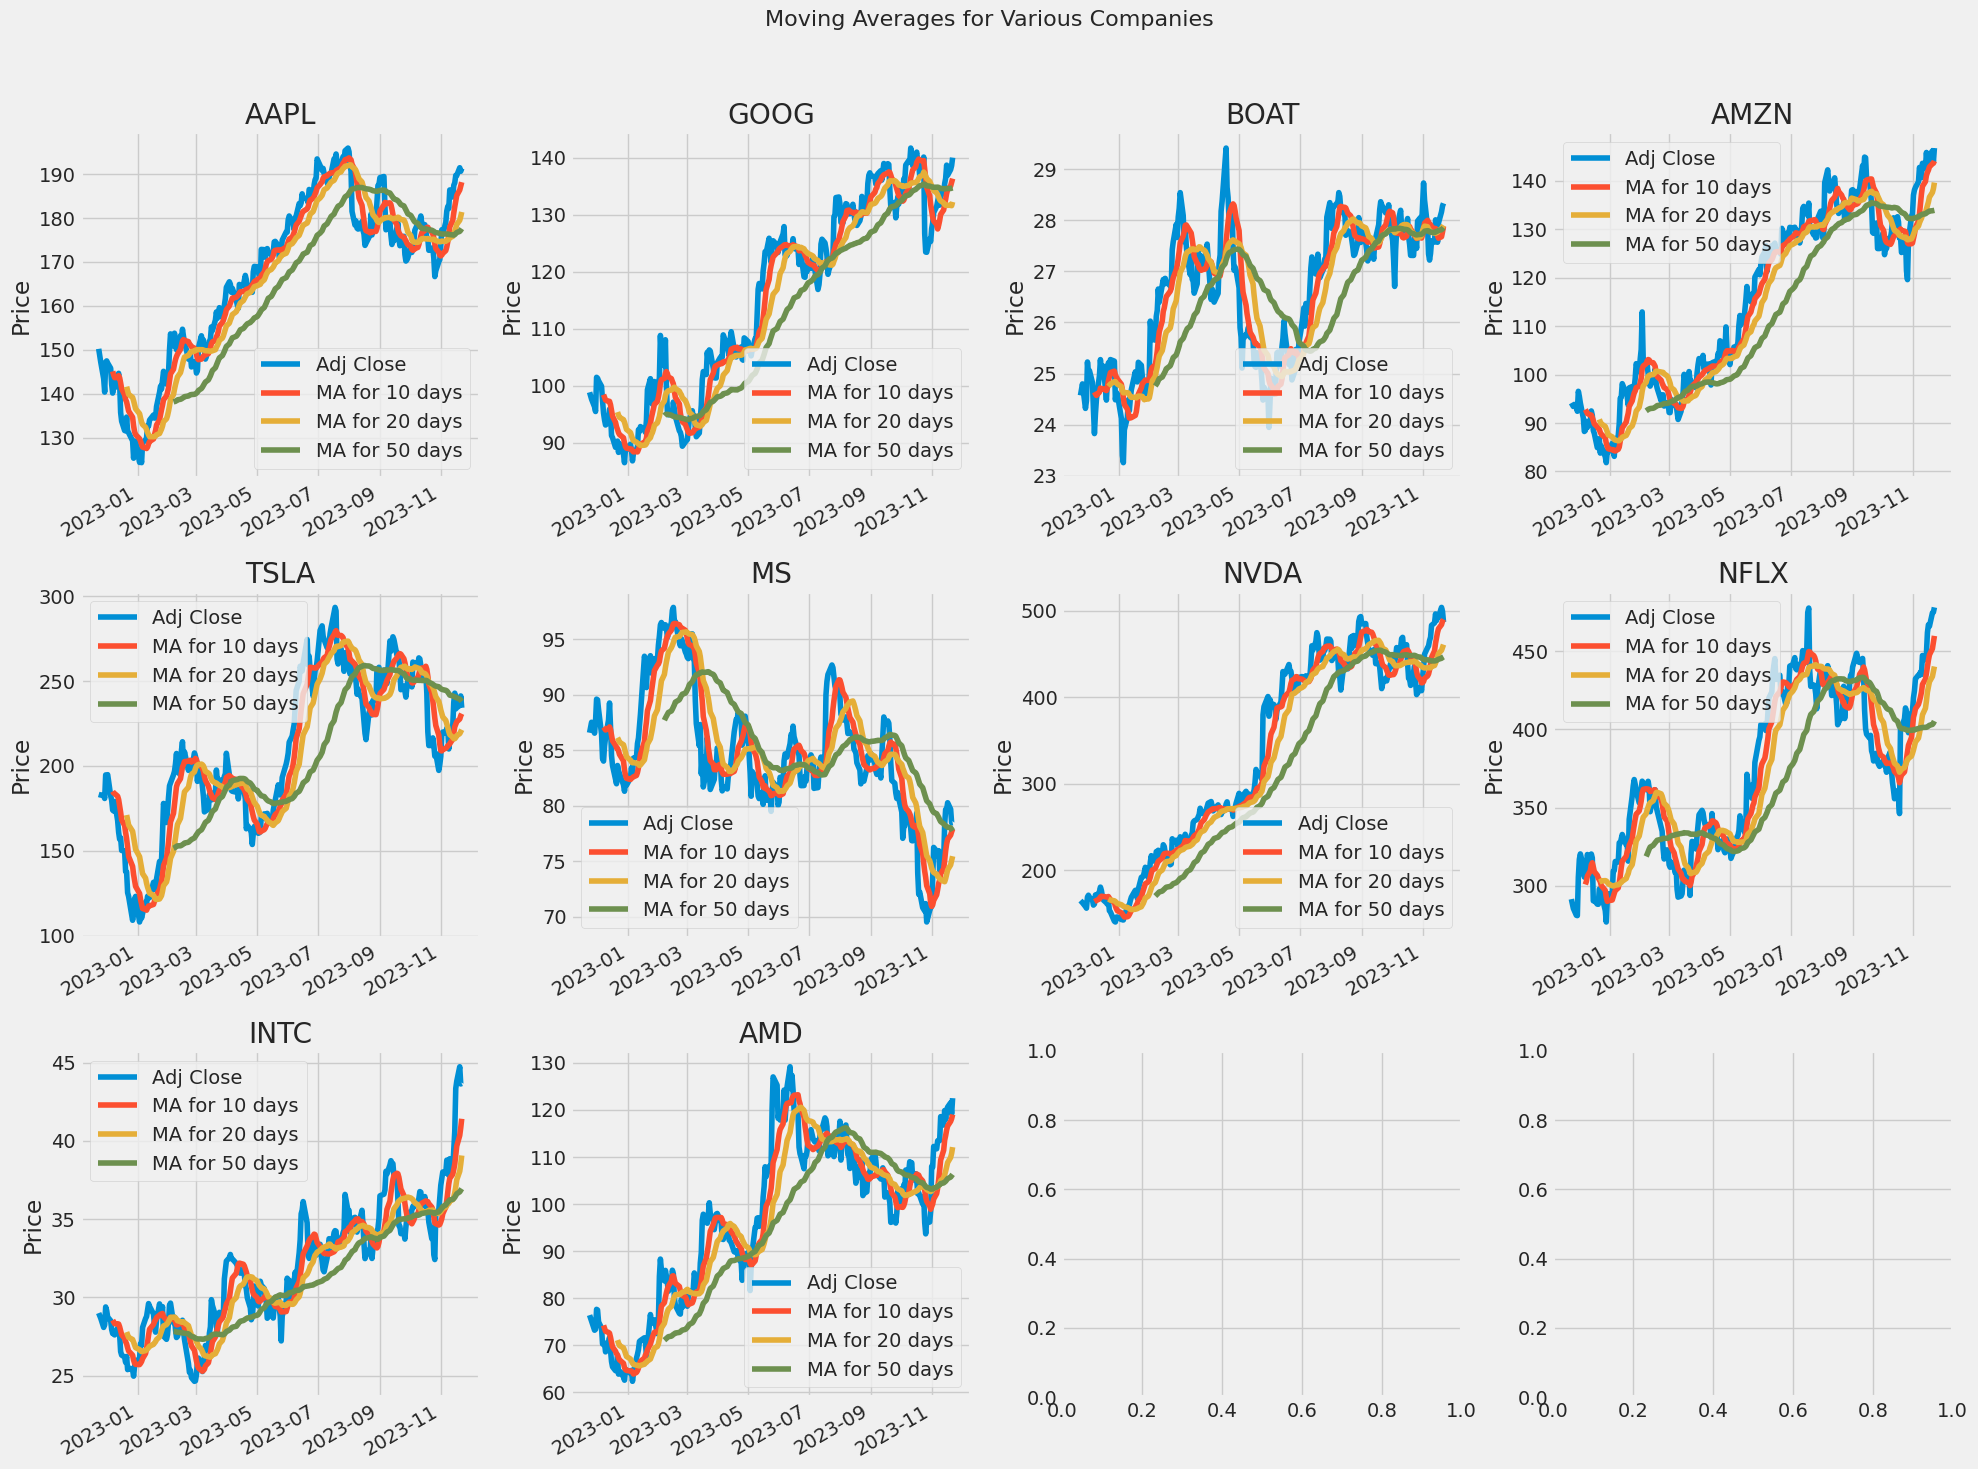

In [ ]:
ma_days = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_days:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Plotting the moving averages for all 10 companies
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle('Moving Averages for Various Companies', fontsize=16)

for i, (company, stock) in enumerate(zip(company_list[:10], tech_list[:10]), 1):
    plt.subplot(3, 4, i)
    company[['Adj Close', f'MA for 10 days', f'MA for 20 days', f'MA for 50 days']].plot(ax=plt.gca())
    plt.title(f'{stock}')
    plt.ylabel('Price')
    plt.xlabel(None)

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


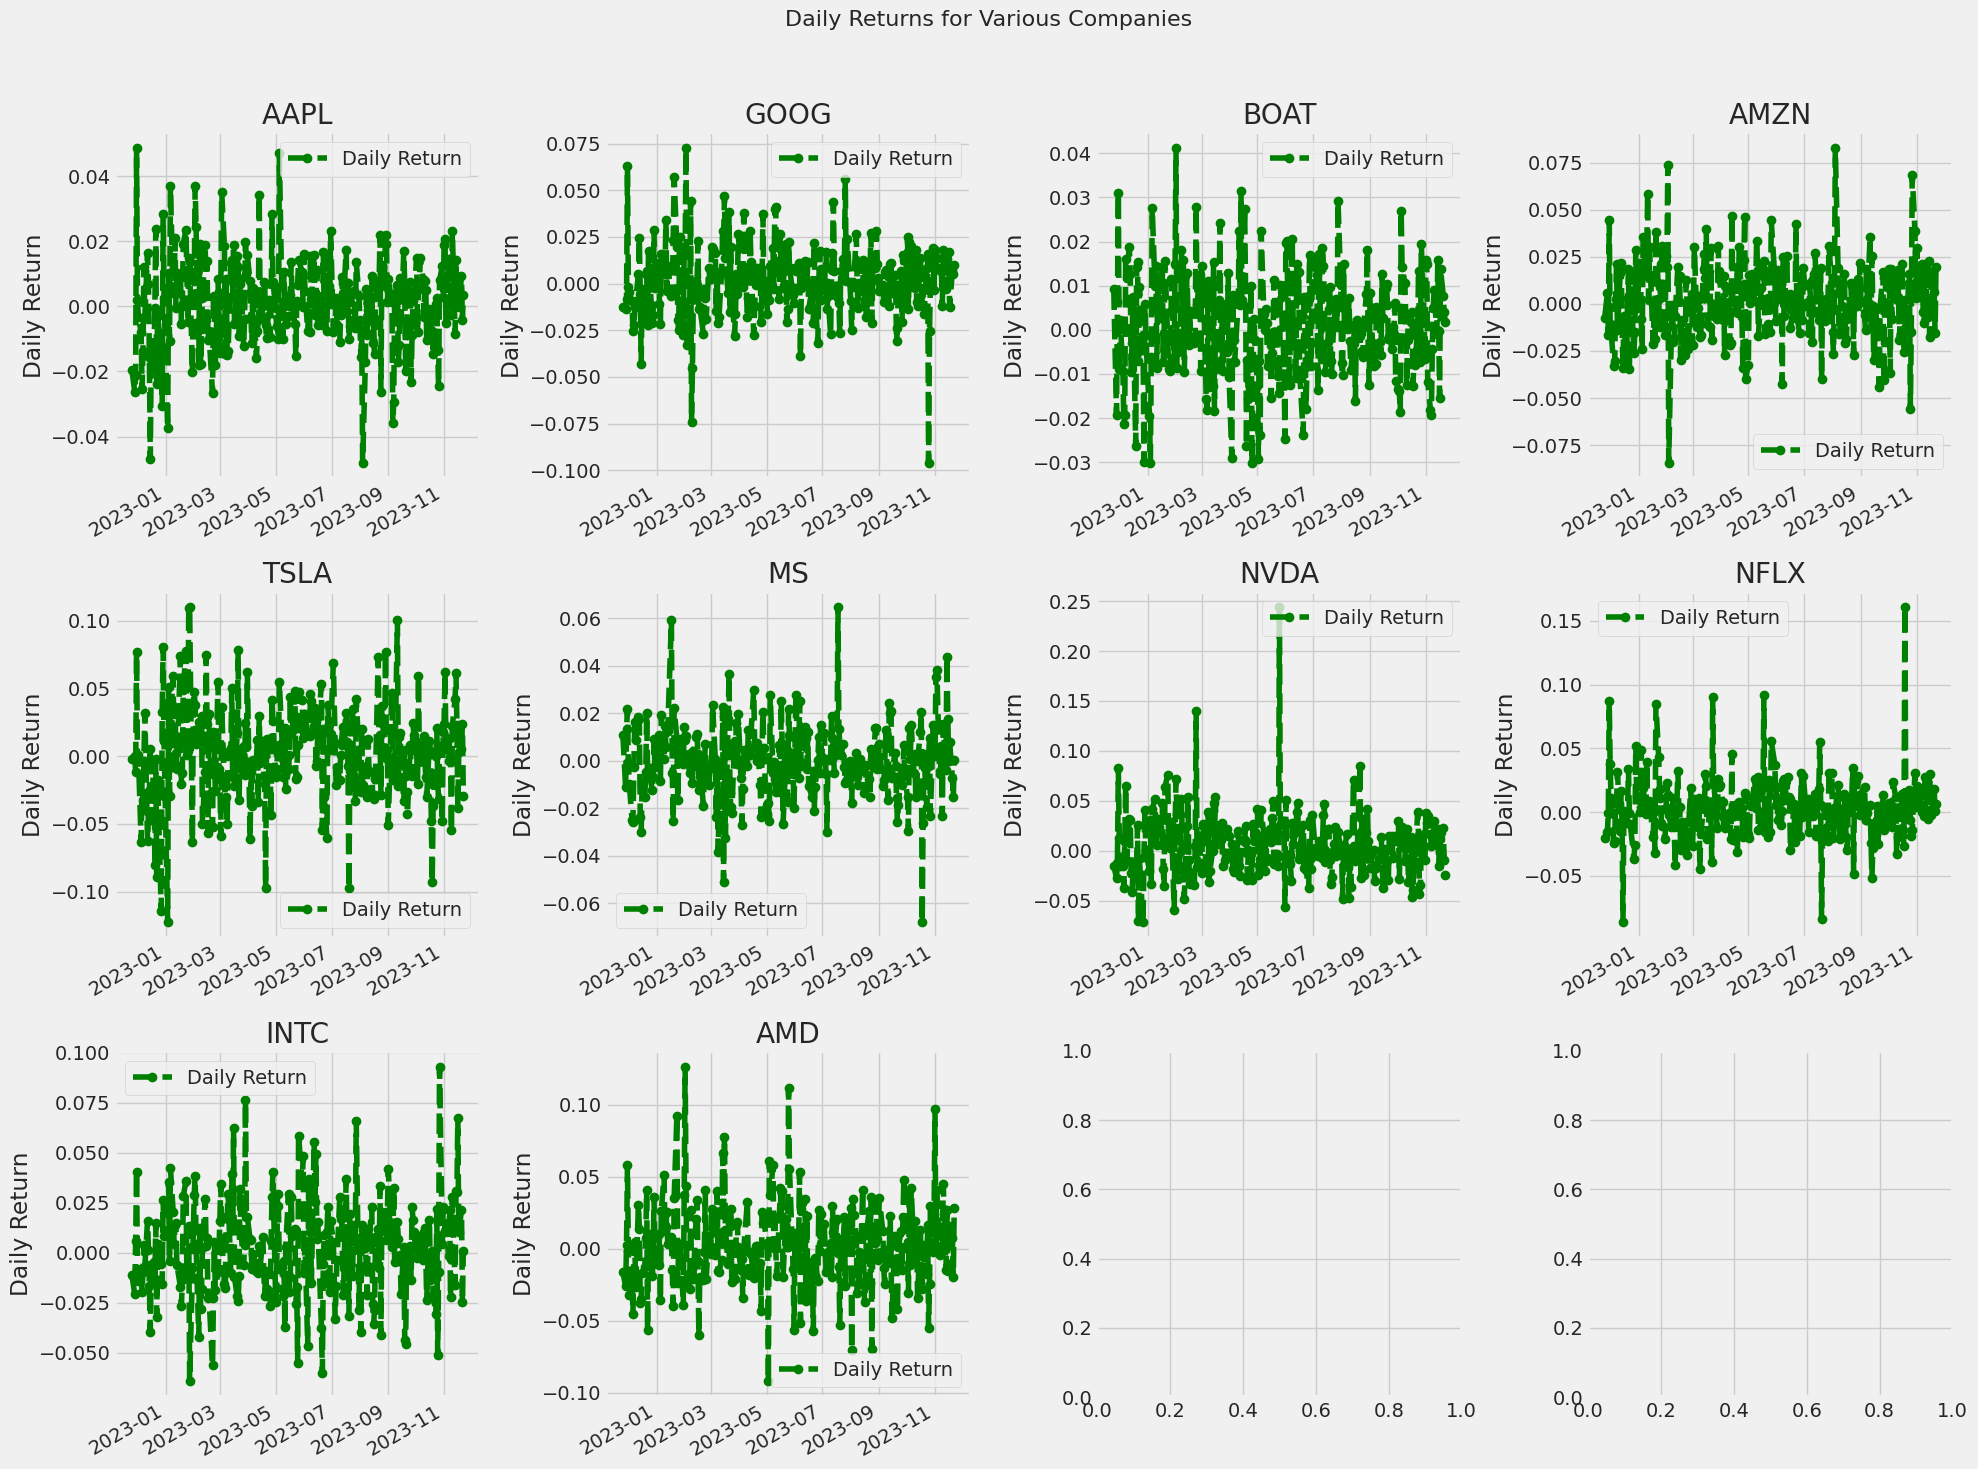

In [ ]:
# Calculate daily returns for each company
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage for all 10 companies
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle('Daily Returns for Various Companies', fontsize=16)

for i, (company, stock) in enumerate(zip(company_list[:10], tech_list[:10]), 1):
    plt.subplot(3, 4, i)
    company['Daily Return'].plot(ax=plt.gca(), legend=True, linestyle='--', marker='o', color='green')
    plt.title(f'{stock}')
    plt.ylabel('Daily Return')
    plt.xlabel(None)

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


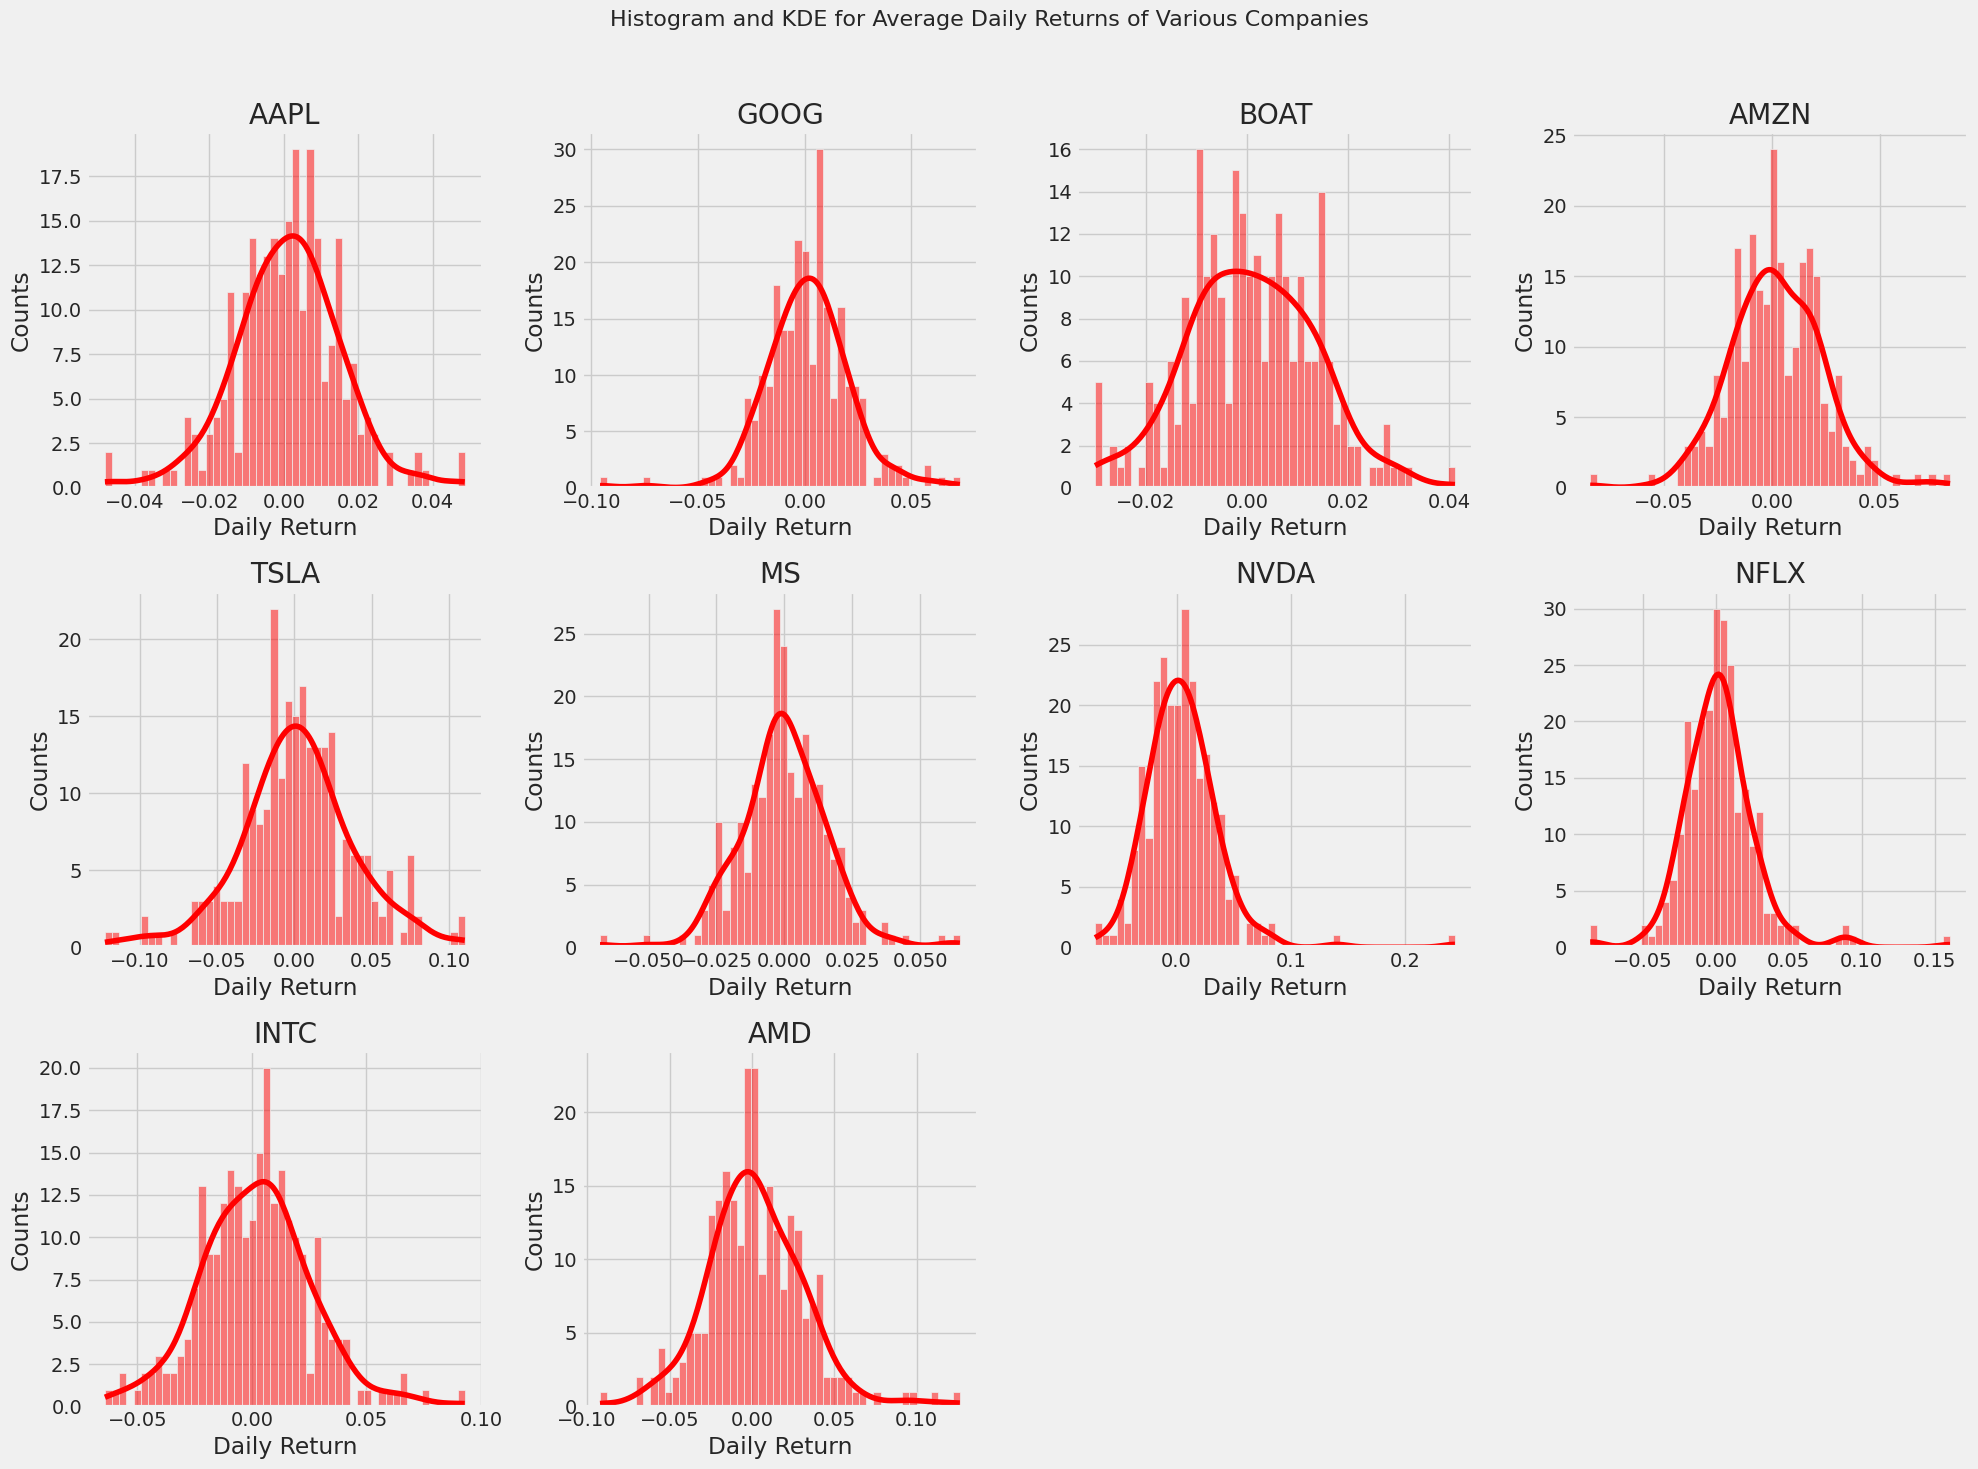

In [ ]:
import seaborn as sns

# Plotting the histogram and kde plot for average daily return for all 10 companies
plt.figure(figsize=(20, 15))
plt.suptitle('Histogram and KDE for Average Daily Returns of Various Companies', fontsize=16)

for i, (company, stock) in enumerate(zip(company_list[:10], tech_list[:10]), 1):
    plt.subplot(3, 4, i)
    sns.histplot(company['Daily Return'].dropna(), bins=50, kde=True, color='red')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{stock}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


[*********************100%%**********************]  10 of 10 completed
Correlation Matrix:
          AAPL       AMD      AMZN      BOAT      GOOG      INTC        MS  \
AAPL  1.000000  0.470527  0.477943  0.337057  0.584185  0.415622  0.348203   
AMD   0.470527  1.000000  0.530621  0.250782  0.502622  0.451596  0.333270   
AMZN  0.477943  0.530621  1.000000  0.249677  0.640525  0.429146  0.294493   
BOAT  0.337057  0.250782  0.249677  1.000000  0.193337  0.177241  0.410430   
GOOG  0.584185  0.502622  0.640525  0.193337  1.000000  0.360527  0.253590   
INTC  0.415622  0.451596  0.429146  0.177241  0.360527  1.000000  0.214329   
MS    0.348203  0.333270  0.294493  0.410430  0.253590  0.214329  1.000000   
NFLX  0.489000  0.388644  0.398009  0.201348  0.386573  0.383783  0.197984   
NVDA  0.506031  0.700184  0.421723  0.286161  0.451265  0.261955  0.380561   
TSLA  0.460078  0.360536  0.367671  0.257678  0.345465  0.232311  0.353035   

          NFLX      NVDA      TSLA  
AAPL  0.48900

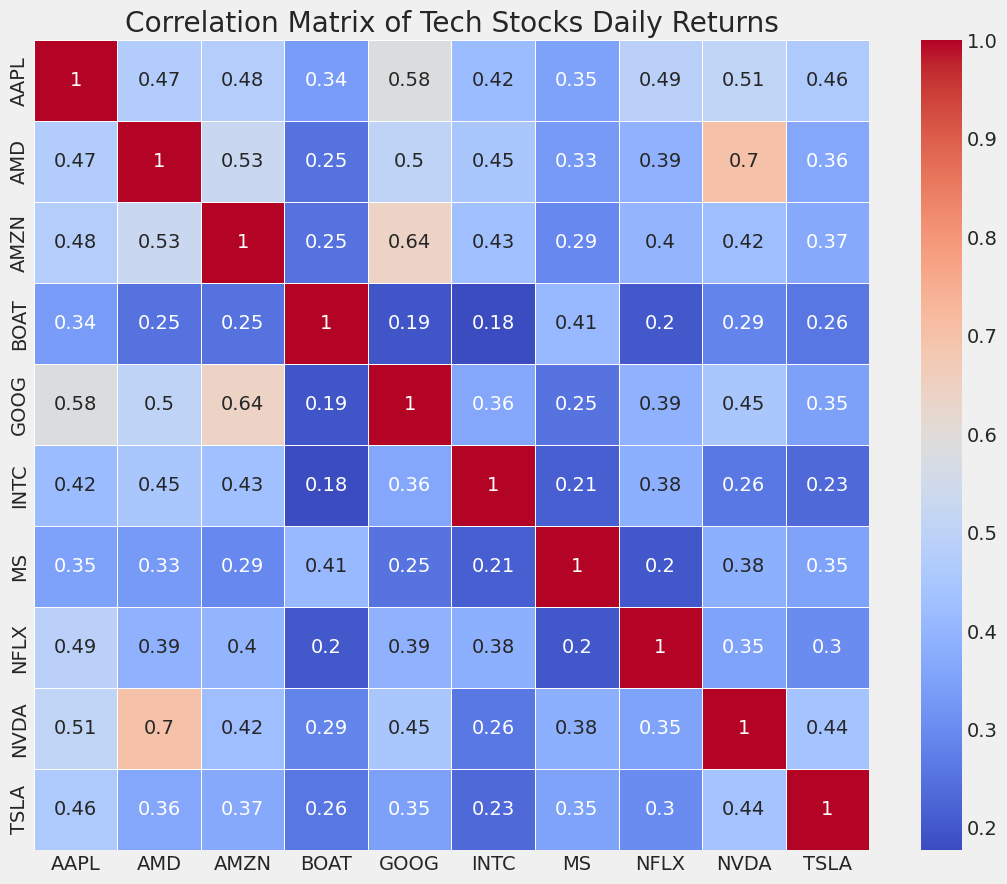

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'BOAT', 'AMZN', 'TSLA', 'MS', 'NVDA', 'NFLX', 'INTC', 'AMD']

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

# Calculate and visualize the correlation matrix
correlation_matrix = tech_rets.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Tech Stocks Daily Returns')
plt.show()


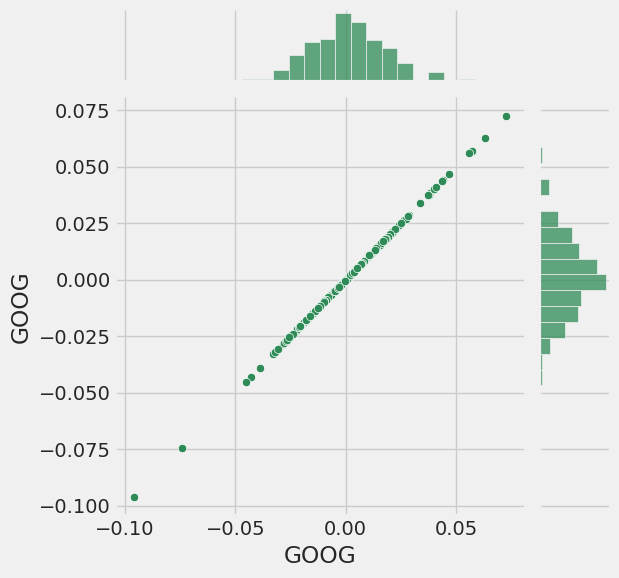

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

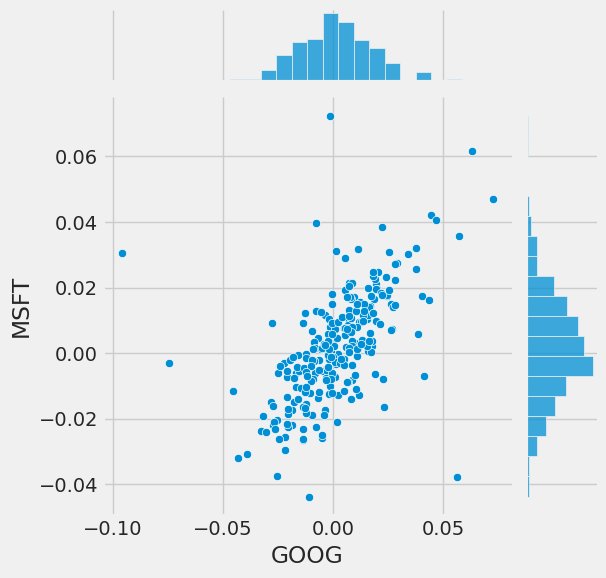

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

[*********************100%%**********************]  10 of 10 completed


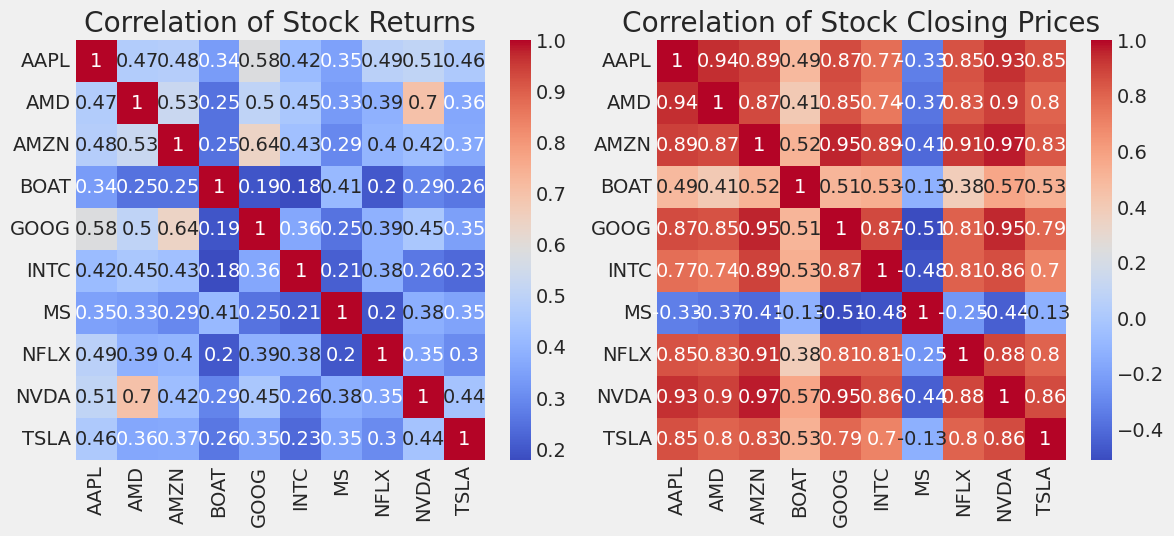

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'BOAT', 'AMZN', 'TSLA', 'MS', 'NVDA', 'NFLX', 'INTC', 'AMD']

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

# Set up the figure and subplots
plt.figure(figsize=(12, 10))

# Correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Stock Returns')

# Correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Stock Closing Prices')

# Adjust the overall layout
plt.tight_layout()
plt.show()


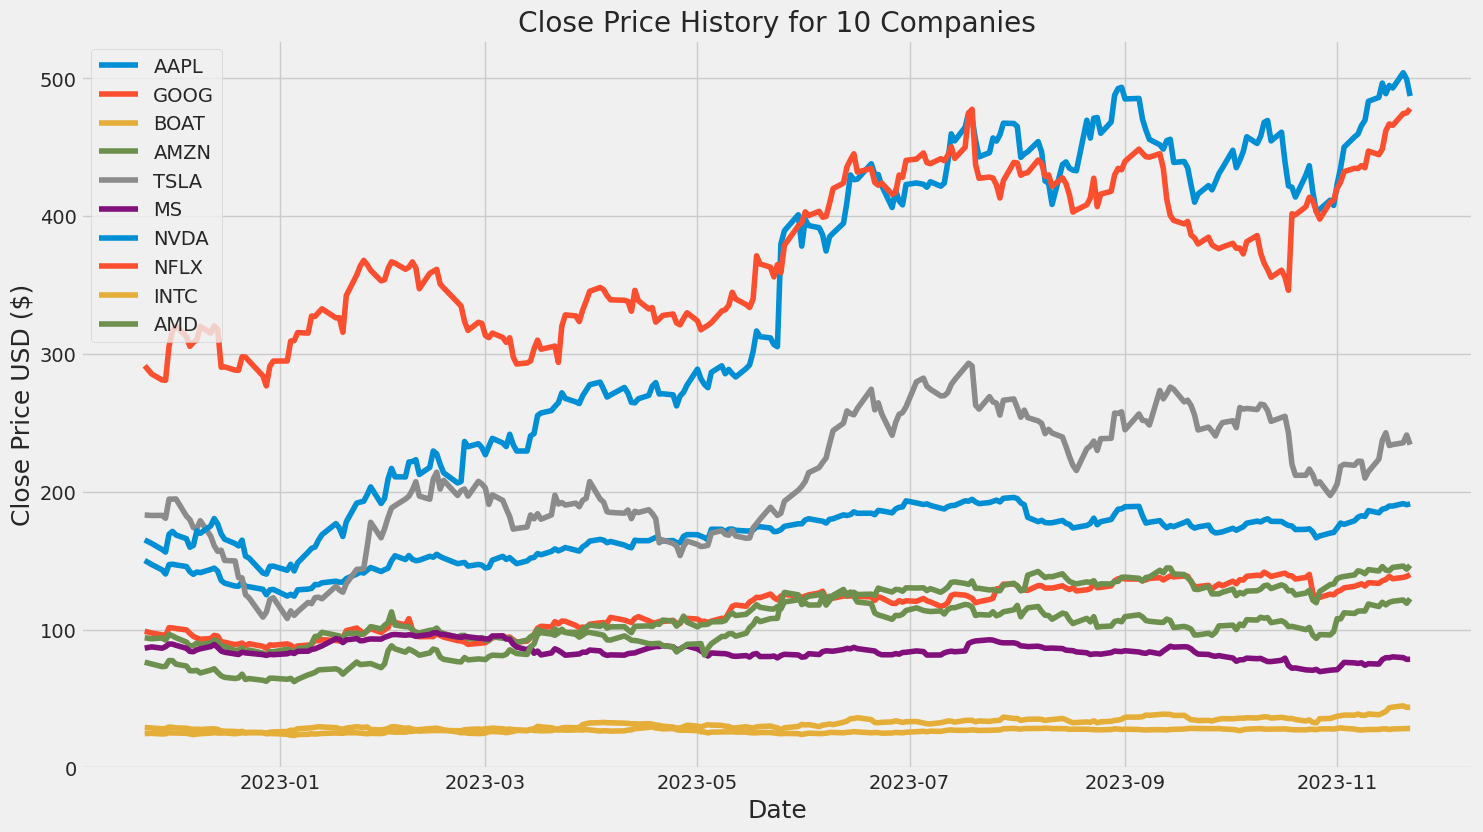

In [ ]:
plt.figure(figsize=(16, 9))

for stock in tech_list:
    if stock in closing_df:
        plt.plot(closing_df[stock], label=stock)

plt.title('Close Price History for 10 Companies')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.449692  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.516598  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.655553  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.787853  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.767570  394024400
5/5 [==============================] - 1s 14ms/step
RMSE: 6.889201185946772


<ipython-input-52-15db7d2e4ec0>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


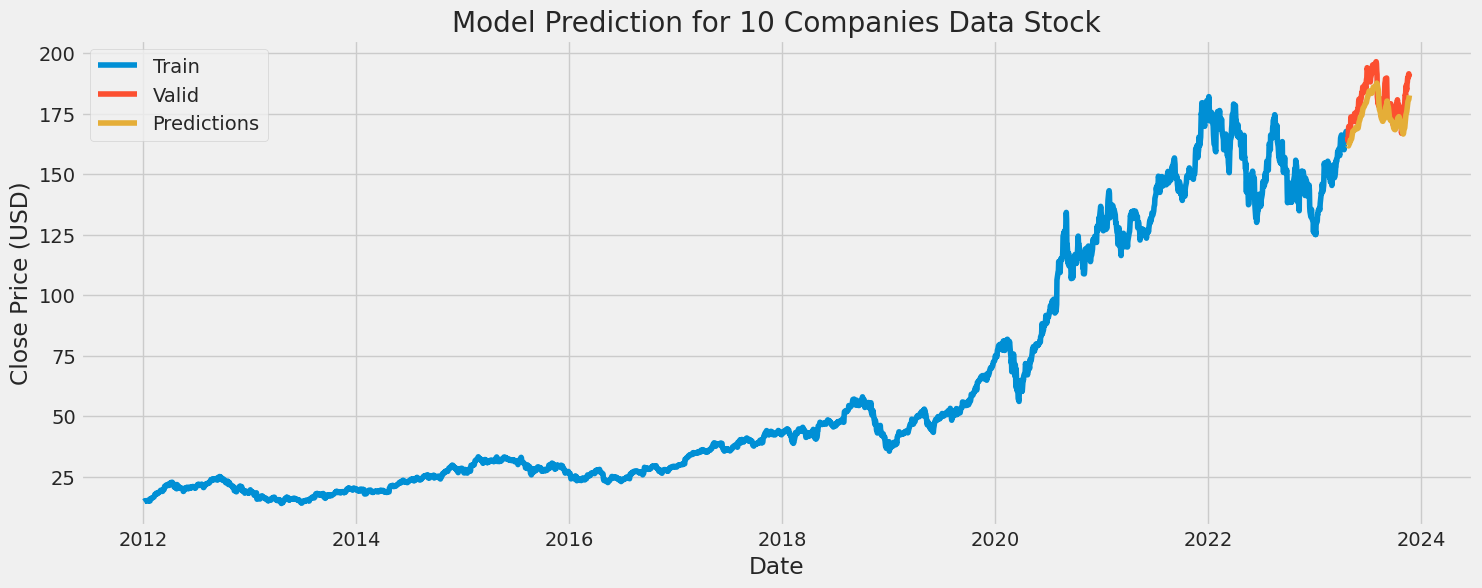

In [ ]:
from sklearn.metrics import mean_absolute_error, accuracy_score

# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df.head())

# Extract the 'Close' column for prediction
data = df.filter(['Close']).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the training data set
train_data_len = int(np.ceil(len(data) * .95))
train_data = scaled_data[0:int(train_data_len), :]

# Split the data into x_train and y_train
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = data[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f"RMSE: {rmse}")

# Plot the data
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model Prediction for 10 Companies Data Stock')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.662048,41949600,162.283035
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.108353,48714100,162.270767
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.098389,45498800,161.989395
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.729614,64902300,161.653015
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.994476,55209200,162.004333
...,...,...,...,...,...,...,...
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900,178.950317
2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700,180.009232
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100,180.903290
